(99995, 105)
99995 84995 14950 50
(84995, 210)
Epoch 1/30
665/665 [==============================] - 1s 1ms/step - loss: 12776.4873 - accuracy: 0.4254 - val_loss: 1915.6946 - val_accuracy: 0.6947

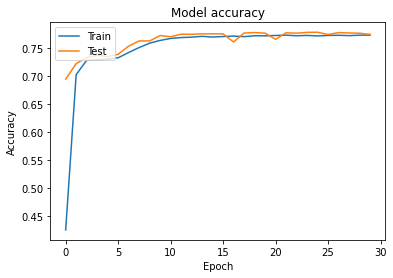

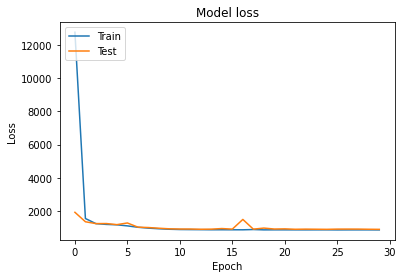

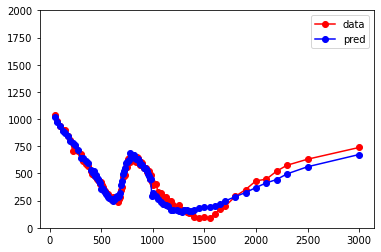

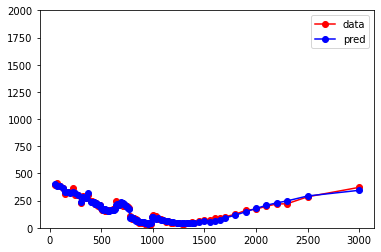

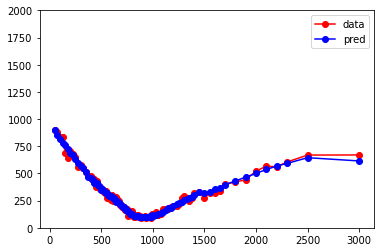

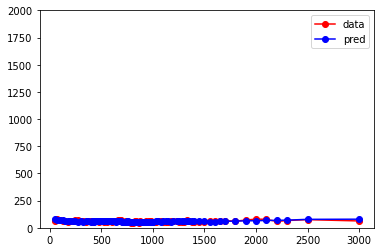

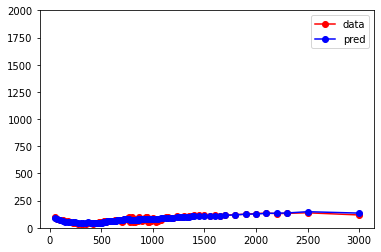

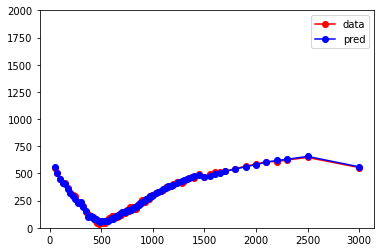

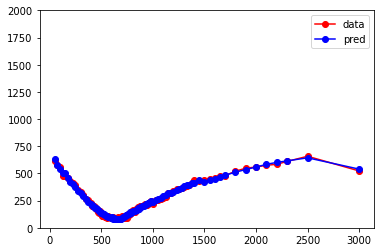

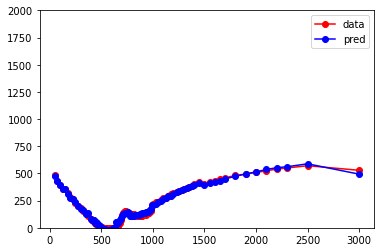

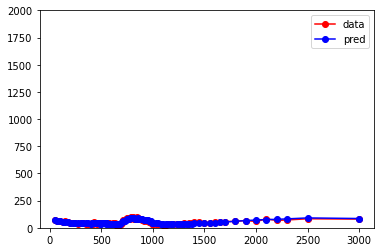

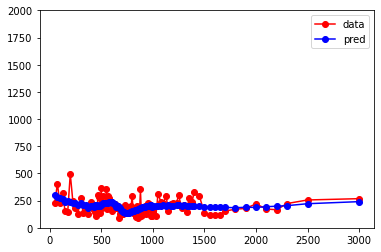

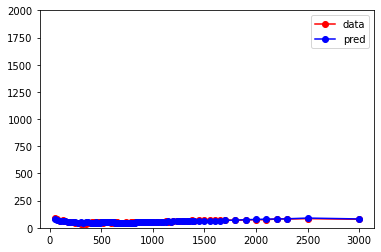

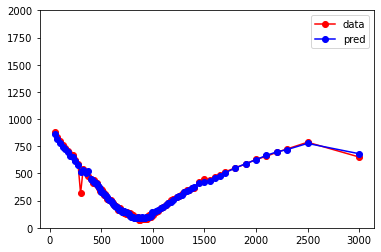

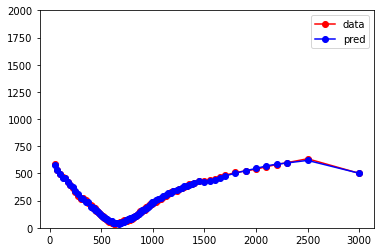

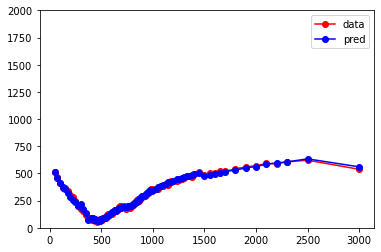

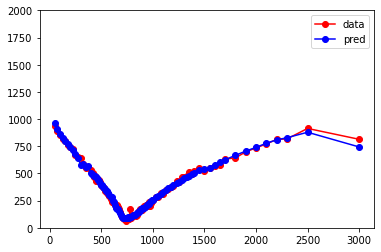

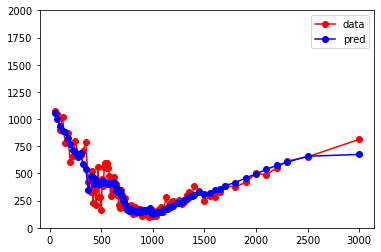

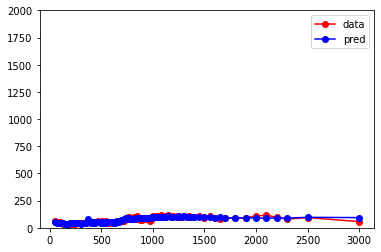

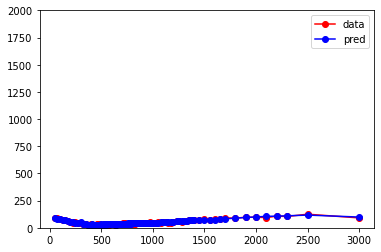

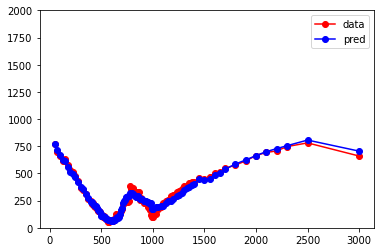

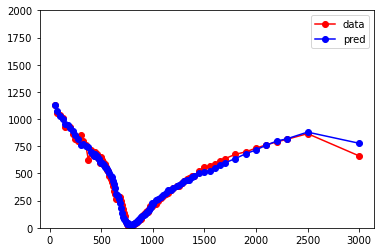

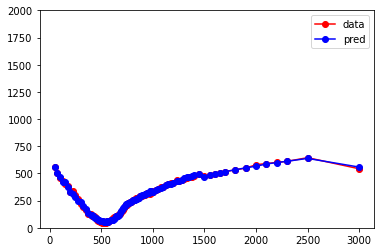

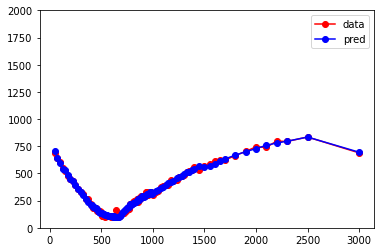

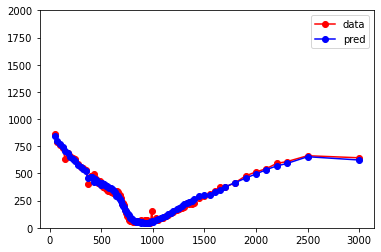

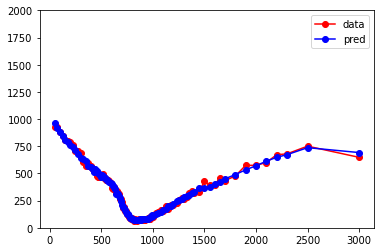

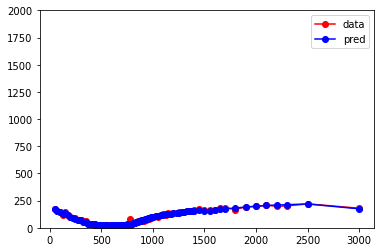

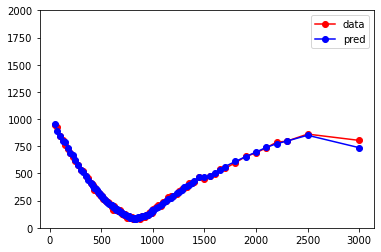

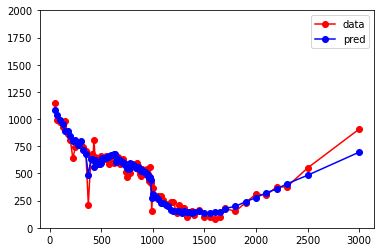

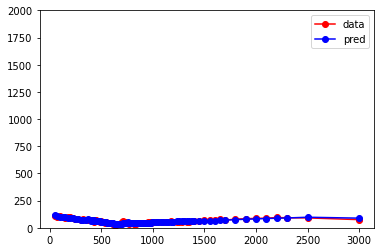

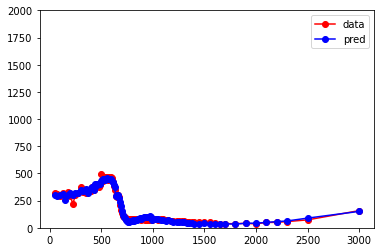

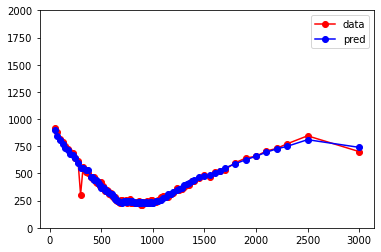

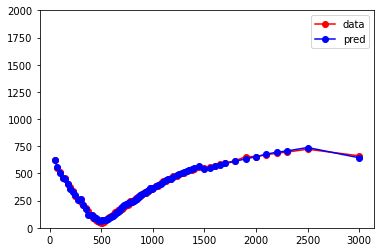

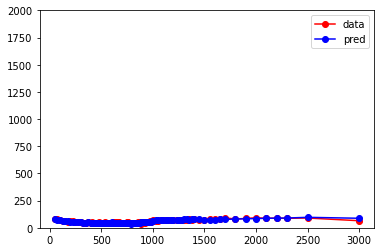

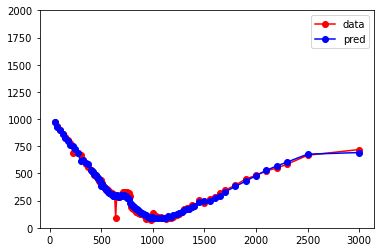

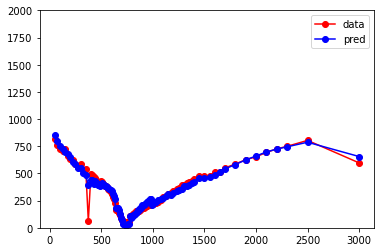

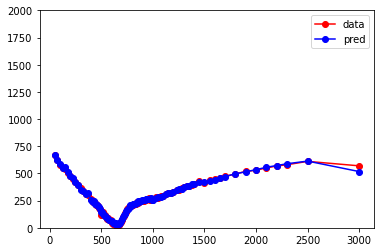

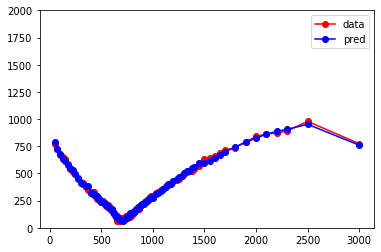

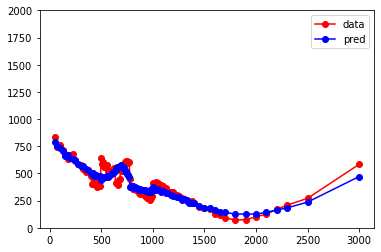

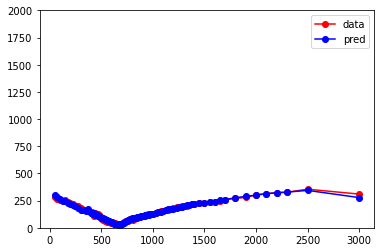

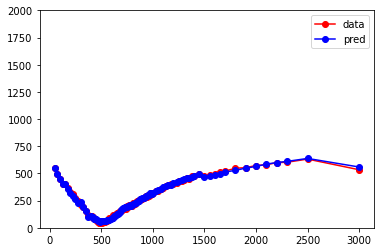

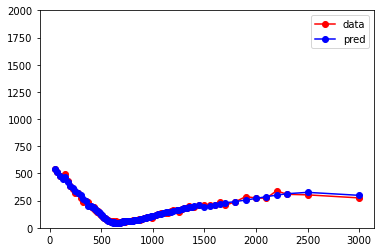

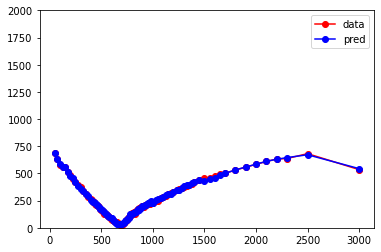

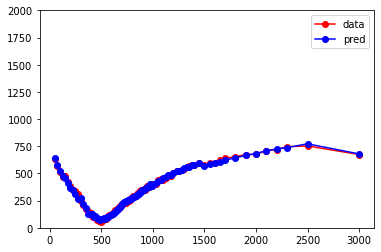

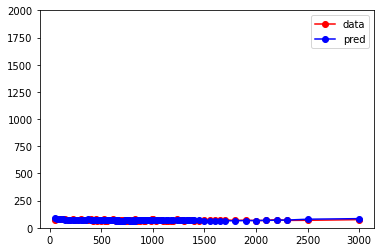

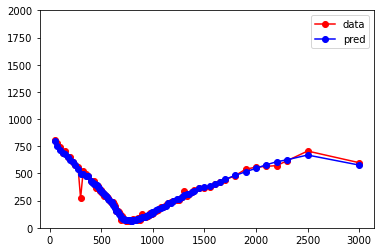

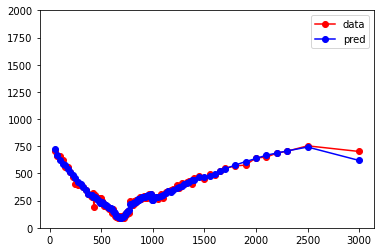

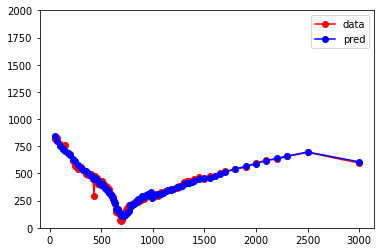

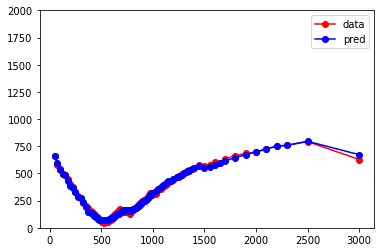

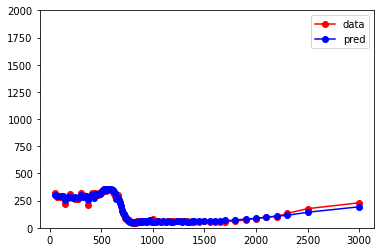

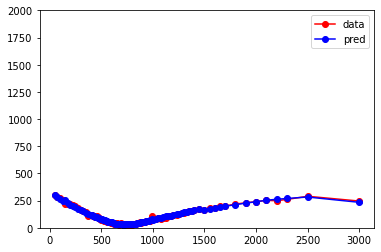

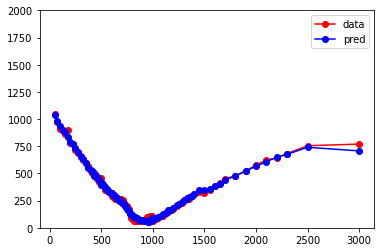

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model

ti_seq = [*list(range(50, 400, 25)),
          *list(range(400, 1000, 10)),
          1000, 1030, 1050, 1080, 1100, 1130, 1150, 1180, 1200, 1230, 1250, 1280, 1300, 1330, 1350, 1380,
          1400, 1450, 1500, 1550, 1600, 1650, 1700,
          1800, 1900, 2000, 2100, 2200, 2300, 2500, 3000]

# Load real shuffled data
data = np.load("data/RD_shuffled.npy")

print(data.shape)
data_with_tis = np.array([list(x) + ti_seq for x in data], dtype=float)

train_in = data_with_tis[:int(len(data_with_tis) * 0.85)]
train_out = data[:int(len(data) * 0.85)]

val_in = data_with_tis[int(len(data_with_tis) * 0.85):-50]
val_out = data[int(len(data) * 0.85):-50]

test_in = data_with_tis[-50:]
test_out = data[-50:]


print(len(data_with_tis), len(train_in), len(val_in), len(test_in))
print(train_in.shape)

new_train = True

if new_train:
    model = tf.keras.models.Sequential()
    # encoder
    model.add(tf.keras.layers.Dense(units=105, activation='elu', input_dim=105, name="in"))
    # model.add(tf.keras.layers.Dense(units=64, activation='relu'))
    # model.add(tf.keras.layers.Dense(units=32, activation='relu'))
    model.add(tf.keras.layers.Dense(units=14, activation='elu', name="bn"))
    model.add(tf.keras.layers.Dense(units=14, activation='elu'))
    # decoder
    # model.add(tf.keras.layers.Dense(units=32, activation='relu'))
    # model.add(tf.keras.layers.Dense(units=64, activation='relu'))
    model.add(tf.keras.layers.Dense(units=105, activation='linear', name="out"))

    mse = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
    model.compile(optimizer='adam', loss=mse, metrics=["accuracy"])

    m_hist = model.fit(train_out, train_out, validation_data=(val_out, val_out), batch_size=128, epochs=30)
    model.save("tf_elu")

    plt.plot(m_hist.history['accuracy'])
    plt.plot(m_hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(m_hist.history['loss'])
    plt.plot(m_hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


In [6]:
model = tf.keras.models.load_model("tf_elu",
                                       custom_objects=None,
                                       compile=True)

enc_model = Model(inputs=model.input,
                  outputs=model.get_layer('bn').output)
enc_output = enc_model.predict(data)

print(np.average(enc_output, axis=0))
cov_m = np.cov(enc_output.T)
# print("Cov")
# print(cov_m)
eig = np.linalg.eigvals(cov_m)
print(eig)

[-1.0000000e+00 -1.0000000e+00 -1.0000000e+00  8.2784430e+02
 -1.0000000e+00 -1.0000000e+00  9.7698059e+02  1.2302899e+03
  1.5672848e+03 -1.0000000e+00  6.0109851e+02  5.9950299e+02
  1.0203056e+03 -1.0000000e+00]
[3.14320600e+06 5.66466544e+05 1.44170180e+05 5.55226000e+04
 2.00970720e+04 9.59973521e+03 1.07955105e+04 8.90927310e-12
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [ ]:
pred = model.predict(test_out)
for i in range(len(test_out)):
    plt.plot(ti_seq, test_out[i], color='red', marker="o", label="data")
    plt.plot(ti_seq, pred[i], color='blue', marker="o", label="pred")
    plt.ylim(0, 2000)
    plt.legend()
    plt.show()